# Food Recalls in the United States

## Data-gathering and Preparation
For part of my final project, I'm applying what I learned from my ["Visualizing with Bokeh and Pandas"](https://jiyoonchoi.github.io/intro-dh-portfolio/lessons/visualizing-with-bokeh/visualizing-with-bokeh.html)  Programming Historian Lesson. With the data (in CSV form) which contains all the information I'm analyzing about the Federal Food Recalls the past 12 years, I was able to generate a graph using Bokeh.

### Initial installations

In [ ]:
# installing packages
pip install pandas bokeh pyproj
pip install "pandas>=1.2.0,<1.2.3" "bokeh>=2.0.0,<2.3.0" "pyproj>=3.0,<3.0.1"

### Using Pandas to Read in CSV Data

In [2]:
# loading data in pandas
import pandas as pd

file = "recalls.csv"
df = pd.read_csv(file)
print(df)

      start_date    end_date               id  \
0     2010-01-09  2012-06-03         001-2010   
1     2010-01-11  2013-06-03         002-2010   
2     2010-01-15  2013-06-03         003-2010   
3     2010-01-18  2013-06-03         004-2010   
4     2010-01-20  2013-06-03         005-2010   
...          ...         ...              ...   
1333  2022-09-23         NaN         033-2022   
1334  2022-09-24         NaN         034-2022   
1335  2022-10-01         NaN  PHA-10012022-01   
1336  2022-10-13         NaN  PHA-10132022-01   
1337  2022-10-16         NaN         035-2022   

                                                  title  \
0     California Firm Recalls Pork Skin Products Due...   
1     Massachusetts Firm Recalls Beef Products Due t...   
2     New York Firm Recalls Beef Carcass That Contai...   
3     California Firm Recalls Beef Products Due to P...   
4     Indiana Firm Recalls Frozen Chicken Pot Pie Pr...   
...                                                 ...  

In [3]:
df.columns.tolist()

['start_date',
 'end_date',
 'id',
 'title',
 'url',
 'reasons',
 'status',
 'risk_level',
 'establishment_id',
 'establishment_slug',
 'establishment_name',
 'establishment_address',
 'establishment_telephone',
 'establishment_grant_date',
 'establishment_activities',
 'quantity_recovered',
 'quantity_unit',
 'states']

## Code

### Using Bokeh to Visualize the Data (Categorical Bar Chart)

In [5]:
# creating a scatter plot
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap

output_file('risk_levels.html')

In [6]:
# using groupby dataframe method
grouped = df.groupby('risk_level')[['quantity_recovered']].sum()

In [7]:
# printing out data
print(grouped)

            quantity_recovered
risk_level                    
High                45877378.0
Low                  5924153.0
Marginal              814947.0


In [8]:
# convert to tons
grouped = grouped / 2000

In [9]:
# create a ColumnDataSource from grouped data and create a figure
source = ColumnDataSource(grouped)
risk_levels = source.data['risk_level'].tolist()
p = figure(x_range=risk_levels)

In [10]:
# add title and label axes
color_map = factor_cmap(field_name='risk_level',
                    palette=Spectral5, factors=risk_levels)

p.vbar(x='risk_level', top='quantity_recovered', source=source, width=0.70, color=color_map)

p.title.text ='Quantity of FDA Recalled Foods by Risk Level'
p.xaxis.axis_label = 'Risk Level'
p.yaxis.axis_label = 'Quantity Recovered (in tons)'

In [11]:
# add interactive hovering element
hover = HoverTool()
hover.tooltips = [
    ("Totals", "@quantity_recovered Quantity Recovered (in pounds)")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

## Artifacts

The resulting bar graph describing the "Quantity of FDA Recalled Foods by Risk Level" is below.
### Figure 1
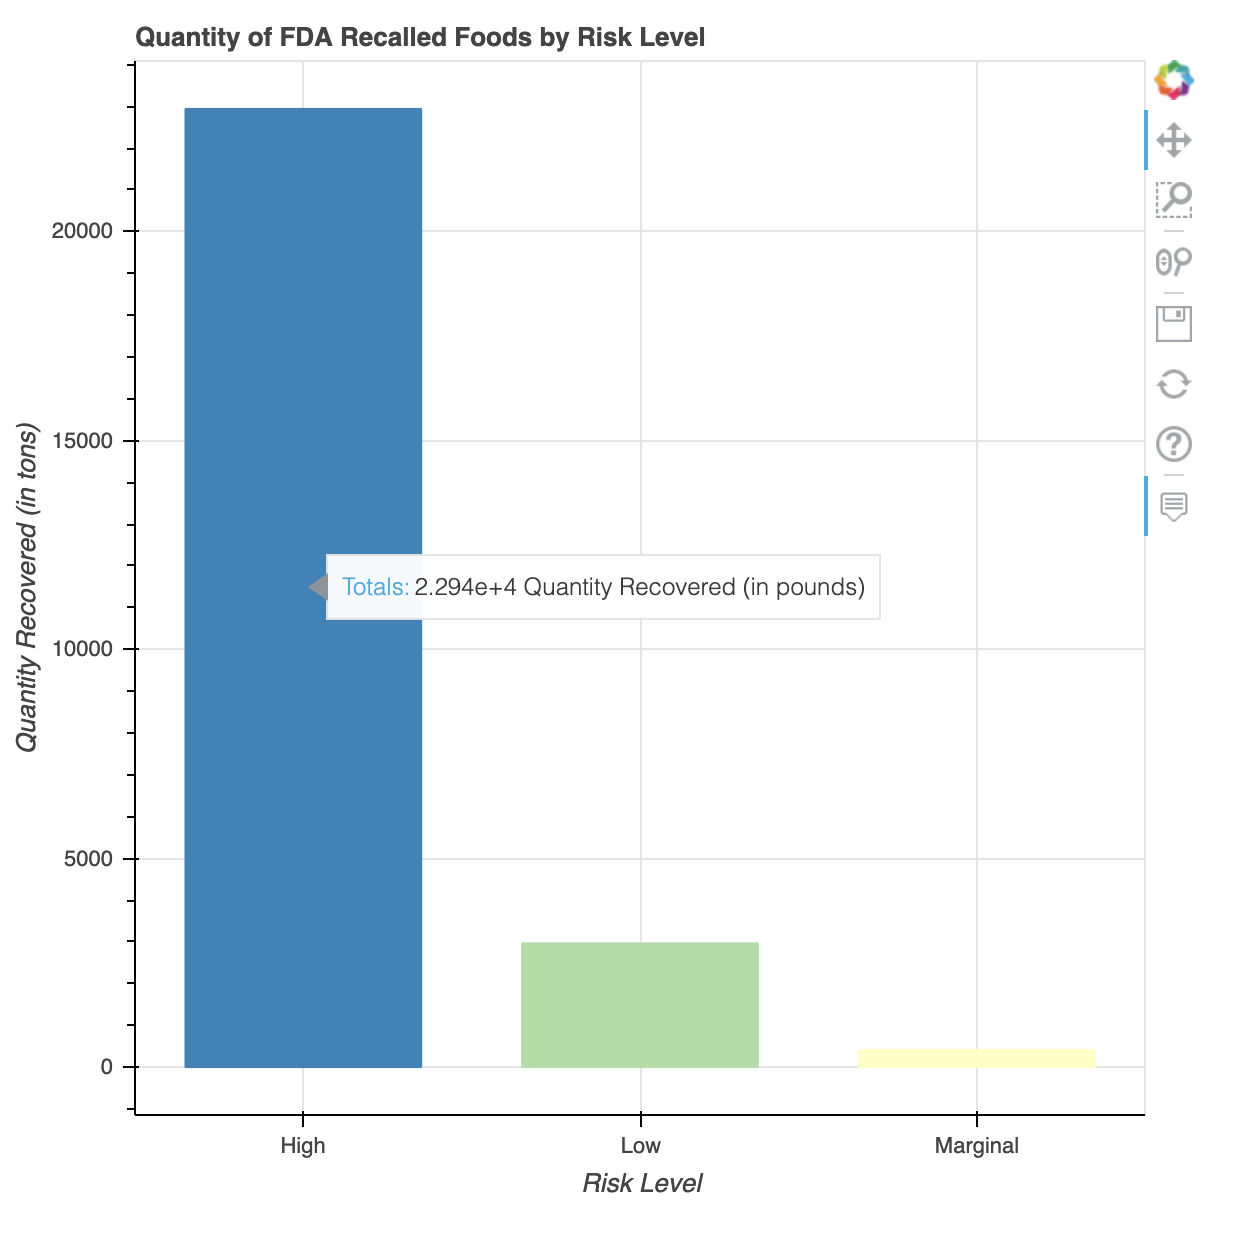

Additionally, I created the following [ArcGIS map](https://tuftsgis.maps.arcgis.com/apps/instant/basic/index.html?appid=bbe3926ecd5b40a19ed183d1263de2d9) visualizing the frequency of food recalls per state in the United States.

### Figure 2
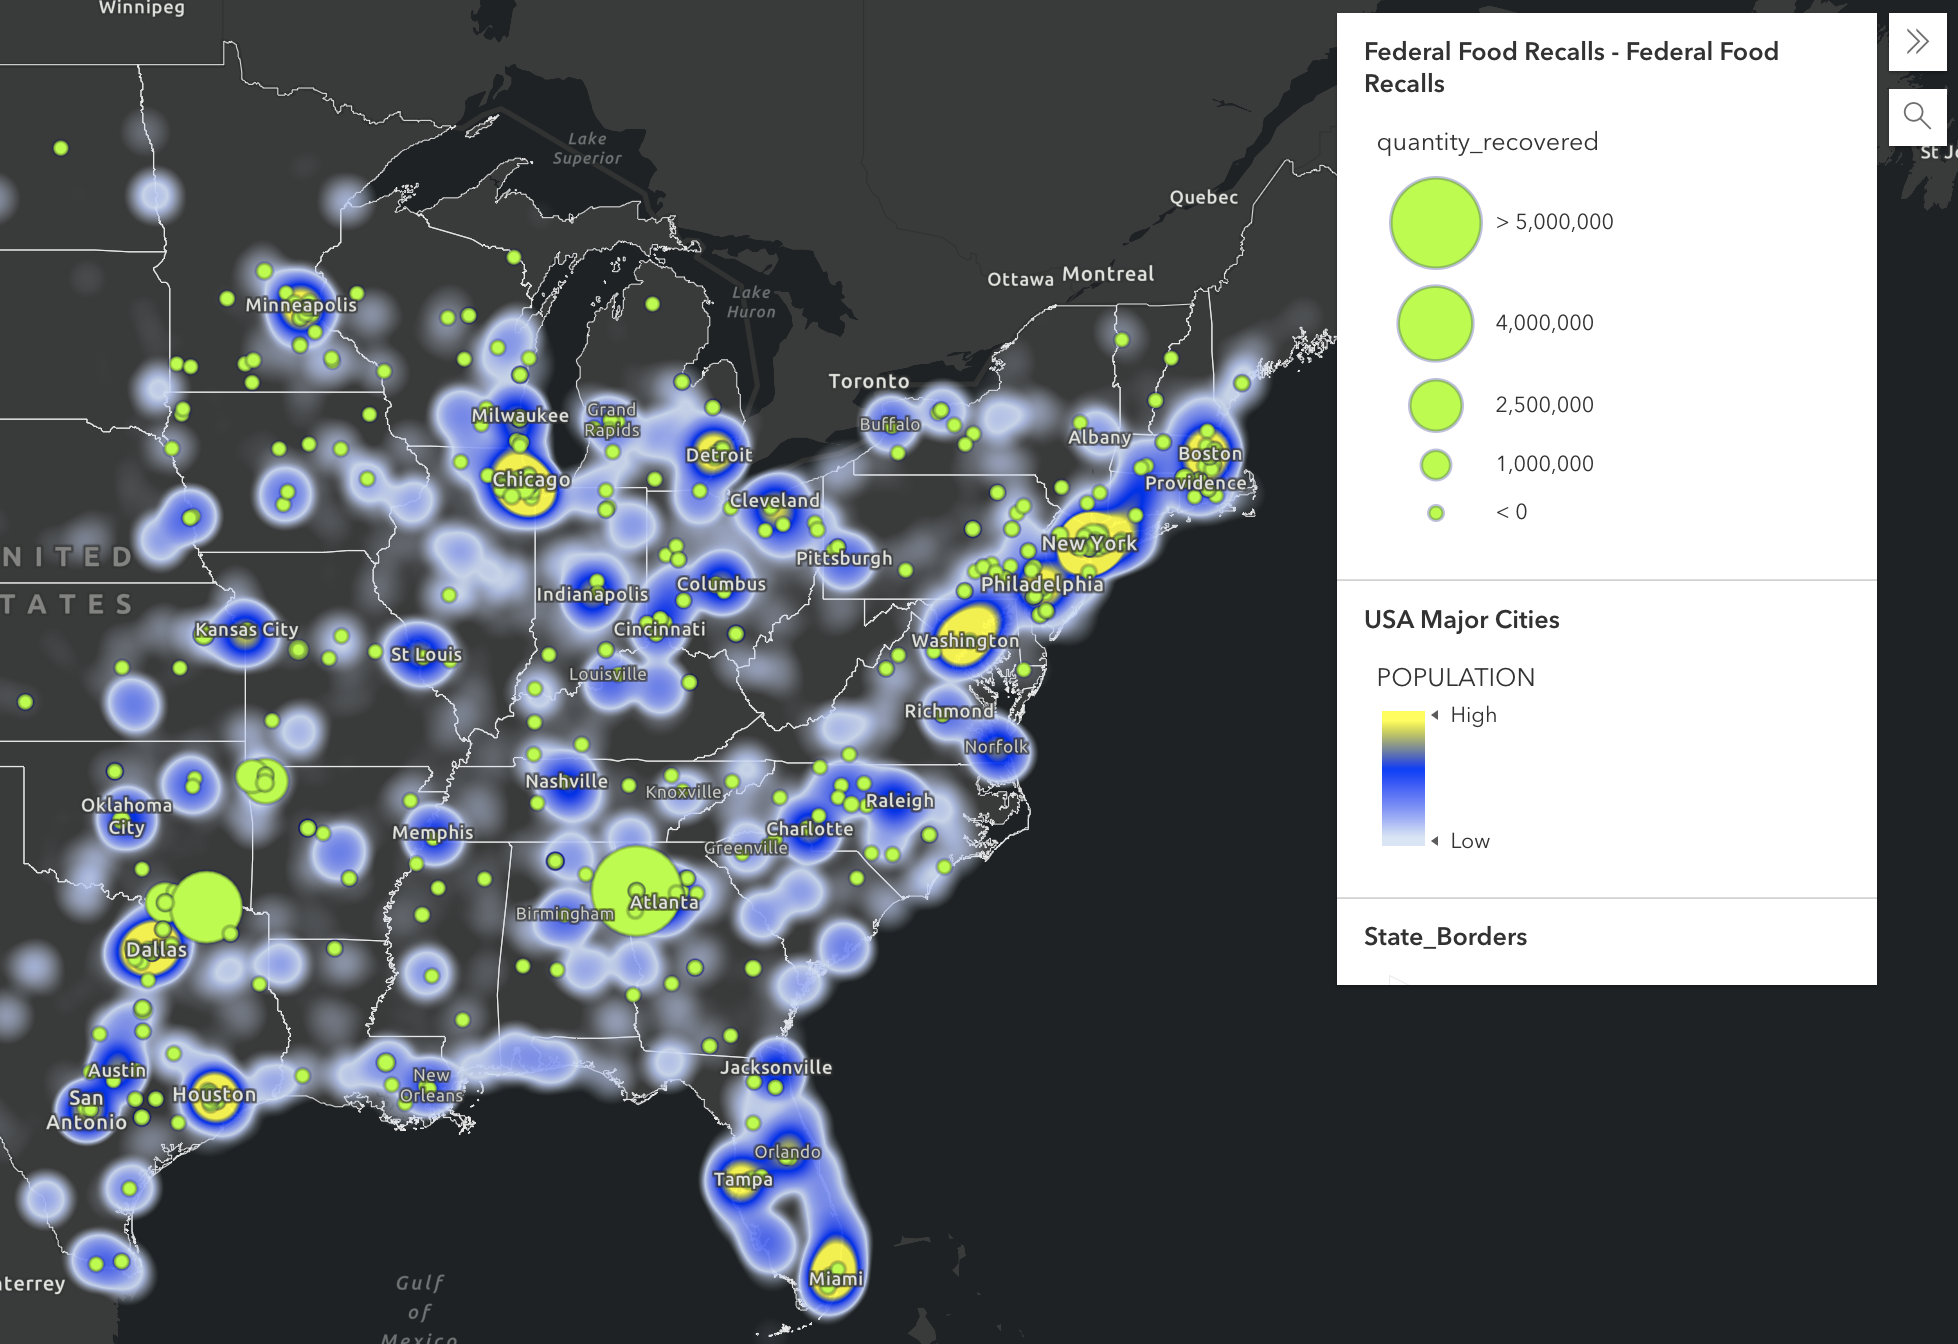

## Written Discussion

<u>Introduction and Context</u> <br>
With my final project, I utilized digital humanities technology to bring awareness to federal food recalls in the United States. I was able to identify and visualize the trends and frequencies for recalls of at-risk foods from a dataset containing food recalls. The dataset was found on Kaggle and is called [“Food Recalls in the United States”](https://www.kaggle.com/datasets/thedevastator/recalls-of-hazardous-foods-in-the-united-states?resource=download). This resource ranges from 2010-2022 and is (via a third party on Kaggle) issued by the United States Department of Agriculture Food Safety and Inspection Service (FSIS) and the Food and Drug Administration (FDA). The dataset contains  1,337 unique cases of official food recalls over the years and their respective reasons risk levels and geographical location. This dataset contains details on product identity, type of recall, date of recall announcement, manufacturer name, sellers/distributors, country of origin, and (if reported) any associated foodborne illnesses.

In the preparation stage of this project, I knew that this information was important for my research because I wanted to demonstrate the leading regions of food recalls and their respective frequencies and analyze what this means for the future of food health.

<u>Artifact/Figure 1 (Bokeh Graph)</u> <br>
I employed Bokeh, which is a visualization tool that plots data on a graph in a readable and digestable way. Using the Bokeh library, I was able to create a bar graph where each bar represented a risk level (high/low/marginal) and the y-axis showed the quantity (in tons) of food items recovered per risk level. The results of the data visualization was interesting yet not too surprising because it makes sense that the FDA would recall more high-risk items than low-risk items. Logically, chasing the lower-risk foods and trying to take them off the shelf wouldn't necessarily be worth the time for FDA officers. However, that did get me thinking: how many undocumented low-risk items end up falling under high-risk later on in future cases? 

<u>Artifact/Figure 2 (ArcGIS)</u> <br>
Additionally, I created supplementary visuals using ArcGIS so I could present two artifacts total. With this second artifact, I visualized the population density of major cities versus the food recall density in the US. As seen in Figure 2, I initially noticed that some of the locations with high frequencies of food recalls are not necessarily proportionate to the population of that area. For example, there is a massive hotspot of FDA food recalls in northeast Texas. However, the population of that area is significantly smaller in relation to the closest city, Dallas. When exploring the [published map](https://tuftsgis.maps.arcgis.com/apps/instant/basic/index.html?appid=bbe3926ecd5b40a19ed183d1263de2d9), the top three areas with the largest frequency of food recalls are near Atlanta, near Dallas, and near Seattle (in descending order). What I realized while processing and familiarizing myself with the data is that these hotspots are a noticeable distance away from their respective metropolitan cities because the data labels their locations as the manufacturing facilities which reside outbound of most cities. I still wonder, however, why does the Atlanta region have the most number of food recalls when the population near Dallas, for instance, is significantly higher?

<u>Issues and Potential for Further Research</u> <br>
Some issues I ran into when working with this data was deciding how I wanted to narrow the categories within my dataset and which of those I would dive deeper into. At first it seemed like there was an abundance of possibilities because as mentioned earlier in this discussion, the dataset contains details on product identity, type of recall, date of recall announcement, manufacturer name, sellers/distributors, country of origin, and (if reported) any associated foodborne illnesses. However, the number of *numerically-based* subdata was minimal. If I were to continue this project over a longer period of time, I would explore the possibilities of scraping the word-based data and organizing them into categories. This would have been difficult to achieve because of the time restraints at the end of this semester because much of the data was specific case-by-case and required extensive categorization. For example, "Texas Firm Recalls Beef Sausage Products Due To Possible Listeria Contamination" and "North Carolina Firm Recalls Chicken Breast Product Due To Misbranding And An Undeclared Allergen" contain very valuable information. Since this requires further text-parsing, I would continue to explore this further if I were to move forward with this project after the course.

<u>Conclusion</u> <br>
In conclusion, tracking the patterns in federal food recalls is important for the safety of our communities because it helps us understand the root causes of food contamination and take steps to prevent it from happening again in the future. By analyzing the data on past recalls, we can identify trends and patterns that may indicate broader issues with the food production or distribution system. For example, if a large number of recalls are linked to a particular supplier or type of food, this could indicate that there are problems with the way that these products are being handled or processed. By identifying and addressing these issues, we can help to protect the health and safety of our communities and prevent future foodborne illness outbreaks. In addition, tracking patterns in recalls can also help to identify any weaknesses in our food safety system and allow us to take steps to improve it. By working to prevent food contamination, we can help to ensure that our communities have access to safe, healthy, and high-quality food. 

Digital humanities is important for protecting community health in several ways. It allows researchers to analyze and interpret large amounts of data quickly and accurately, which can help identify trends and patterns that may be relevant to public health. Digital humanities can also be used to develop and disseminate public health messages more effectively, using targeted and personalized approaches to reach specific groups or communities. Finally, digital humanities can help to improve the accessibility and dissemination of information on public health issues like federal food recalls, allowing more people to stay informed and take steps to protect themselves and their communities.